# Plot Tour Length vs Radius and Number of Passengers

### Global Calls

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import curve_fit

## Fishcreek

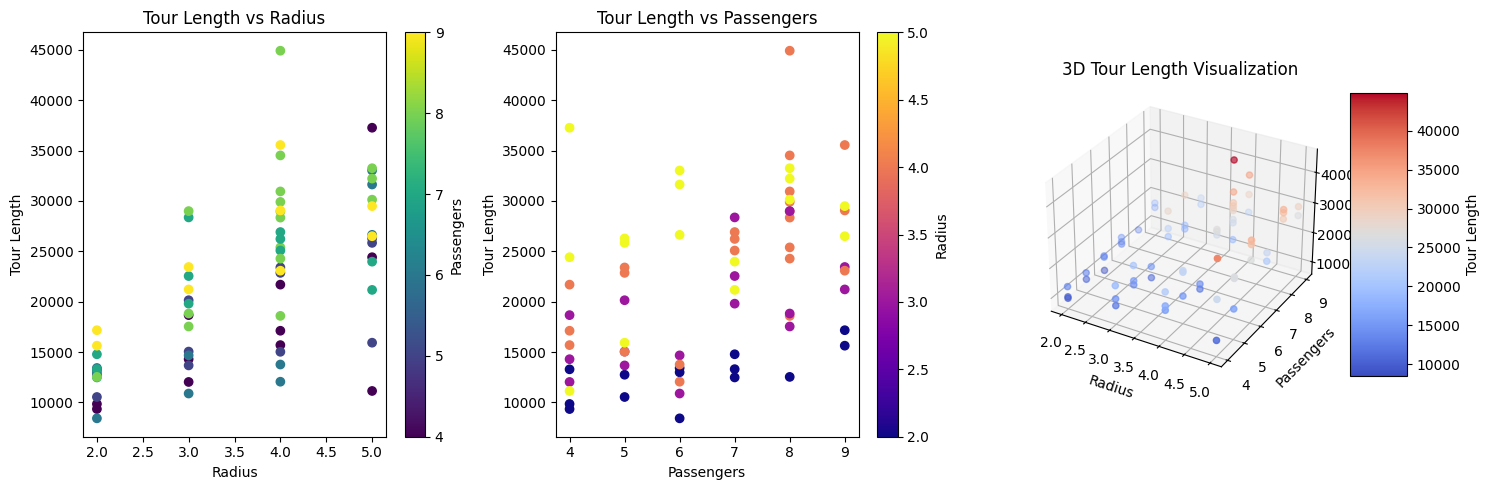

Data Summary:
          Radius  Passengers   Tour_Length
count  69.000000   69.000000     69.000000
mean    3.594203    6.507246  21430.171087
std     1.061614    1.703139   8074.013812
min     2.000000    4.000000   8420.178000
25%     3.000000    5.000000  14290.647000
50%     4.000000    7.000000  21213.701000
75%     4.000000    8.000000  26908.601000
max     5.000000    9.000000  44905.446000

Correlation Matrix:
               Radius  Passengers  Tour_Length
Radius       1.000000    0.058584     0.644740
Passengers   0.058584    1.000000     0.444246
Tour_Length  0.644740    0.444246     1.000000


In [3]:
# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# 1. Scatter plot: Tour Length vs Radius
plt.subplot(131)
plt.scatter(df['Radius'], df['Tour_Length'], c=df['Passengers'], cmap='viridis')
plt.xlabel('Radius')
plt.ylabel('Tour Length')
plt.title('Tour Length vs Radius')
plt.colorbar(label='Passengers')

# 2. Scatter plot: Tour Length vs Passengers
plt.subplot(132)
plt.scatter(df['Passengers'], df['Tour_Length'], c=df['Radius'], cmap='plasma')
plt.xlabel('Passengers')
plt.ylabel('Tour Length')
plt.title('Tour Length vs Passengers')
plt.colorbar(label='Radius')

# 3. 3D Scatter plot
plt.subplot(133, projection='3d')
ax = plt.gca()
scatter = ax.scatter(df['Radius'], df['Passengers'], df['Tour_Length'], 
                     c=df['Tour_Length'], cmap='coolwarm')
ax.set_xlabel('Radius')
ax.set_ylabel('Passengers')
ax.set_zlabel('Tour Length')
ax.set_title('3D Tour Length Visualization')
plt.colorbar(scatter, shrink=0.8, aspect=5, label='Tour Length')

plt.tight_layout()
plt.show()

# Optional: Calculate and print some basic statistics
print("Data Summary:")
print(df[['Radius', 'Passengers', 'Tour_Length']].describe())

# Optional: Calculate correlation
print("\nCorrelation Matrix:")
print(df[['Radius', 'Passengers', 'Tour_Length']].corr())

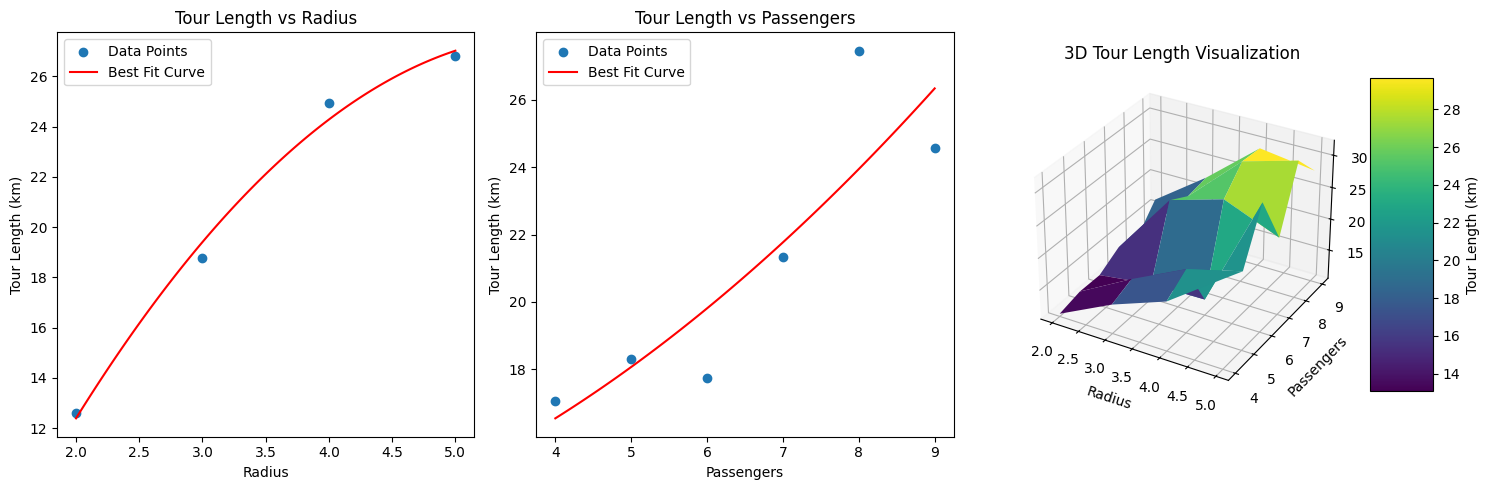

Correlation between variables:
                  Radius  Passengers  Tour_Length_km
Radius          1.000000    0.058584        0.644740
Passengers      0.058584    1.000000        0.444246
Tour_Length_km  0.644740    0.444246        1.000000


In [6]:
# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Convert Tour Length to kilometers
df['Tour_Length_km'] = df['Tour_Length'] / 1000

# Define curve fitting functions
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Create figure with three subplots
plt.figure(figsize=(15, 5))

# 1. Tour Length vs Radius
plt.subplot(131)
# Group by unique radius values and calculate mean tour length
radius_grouped = df.groupby('Radius')['Tour_Length_km'].mean().reset_index()
plt.scatter(radius_grouped['Radius'], radius_grouped['Tour_Length_km'], label='Data Points')

# Fit curve
popt, _ = curve_fit(polynomial_fit, radius_grouped['Radius'], radius_grouped['Tour_Length_km'])
x_fit = np.linspace(radius_grouped['Radius'].min(), radius_grouped['Radius'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Radius')
plt.ylabel('Tour Length (km)')
plt.title('Tour Length vs Radius')
plt.legend()

# 2. Tour Length vs Passengers
plt.subplot(132)
# Group by unique passengers values and calculate mean tour length
passengers_grouped = df.groupby('Passengers')['Tour_Length_km'].mean().reset_index()
plt.scatter(passengers_grouped['Passengers'], passengers_grouped['Tour_Length_km'], label='Data Points')

# Fit curve
popt, _ = curve_fit(polynomial_fit, passengers_grouped['Passengers'], passengers_grouped['Tour_Length_km'])
x_fit = np.linspace(passengers_grouped['Passengers'].min(), passengers_grouped['Passengers'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Passengers')
plt.ylabel('Tour Length (km)')
plt.title('Tour Length vs Passengers')
plt.legend()

# 3. 3D Surface Plot for Tour Length vs Passengers vs Radius
plt.subplot(133, projection='3d')
ax = plt.gca()

# Create a mesh grid for surface plotting
unique_passengers = sorted(df['Passengers'].unique())
unique_radius = sorted(df['Radius'].unique())
X, Y = np.meshgrid(unique_radius, unique_passengers)

# Calculate Z values (average Tour Length)
Z = np.zeros_like(X, dtype=float)
for i, passengers in enumerate(unique_passengers):
    for j, radius in enumerate(unique_radius):
        subset = df[(df['Passengers'] == passengers) & (df['Radius'] == radius)]
        Z[i, j] = subset['Tour_Length_km'].mean() if len(subset) > 0 else np.nan

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Radius')
ax.set_ylabel('Passengers')
ax.set_zlabel('Tour Length (km)')
ax.set_title('3D Tour Length Visualization')

plt.colorbar(surf, shrink=0.8, aspect=5, label='Tour Length (km)')

plt.tight_layout()
plt.show()

# Print some additional insights
print("Correlation between variables:")
print(df[['Radius', 'Passengers', 'Tour_Length_km']].corr())

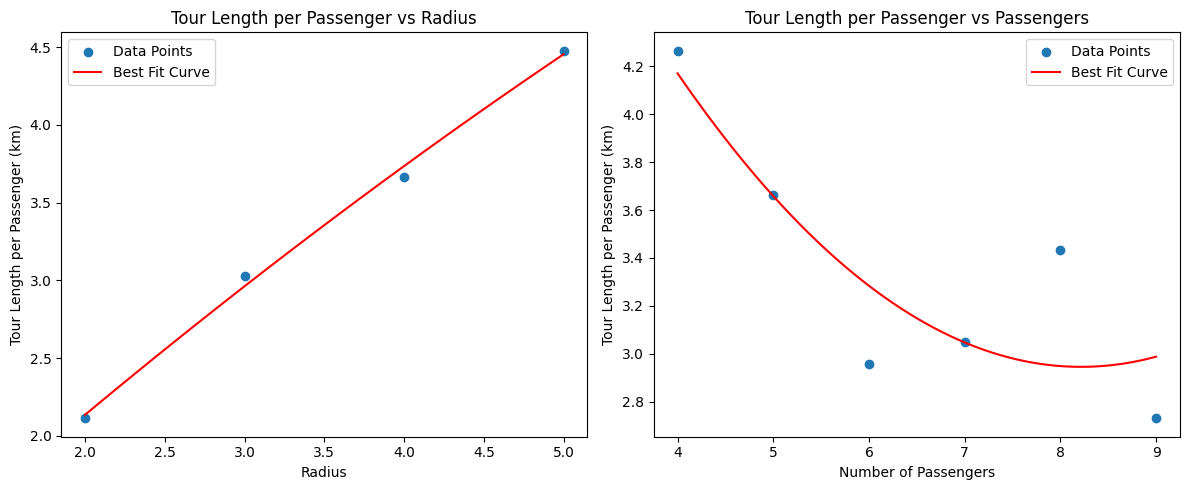

Descriptive Statistics for Tour Length per Passenger (km):
count    69.000000
mean      3.392085
std       1.314726
min       1.403363
25%       2.357078
50%       3.220567
75%       4.026933
max       9.315432
Name: Tour_Length_per_Passenger_km, dtype: float64

Correlation between variables:
                                Radius  Passengers  \
Radius                        1.000000    0.058584   
Passengers                    0.058584    1.000000   
Tour_Length_per_Passenger_km  0.620973   -0.291365   

                              Tour_Length_per_Passenger_km  
Radius                                            0.620973  
Passengers                                       -0.291365  
Tour_Length_per_Passenger_km                      1.000000  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Calculate Tour Length per Passenger
df['Tour_Length_per_Passenger_km'] = df['Tour_Length'] / (1000 * df['Passengers'])

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# 1. Tour Length per Passenger vs Radius
plt.subplot(121)
# Group by unique radius values and calculate mean tour length per passenger
radius_grouped = df.groupby('Radius')['Tour_Length_per_Passenger_km'].mean().reset_index()

# Scatter plot
plt.scatter(radius_grouped['Radius'], radius_grouped['Tour_Length_per_Passenger_km'], label='Data Points')

# Polynomial fit
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

popt, _ = curve_fit(polynomial_fit, radius_grouped['Radius'], radius_grouped['Tour_Length_per_Passenger_km'])
x_fit = np.linspace(radius_grouped['Radius'].min(), radius_grouped['Radius'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Radius')
plt.ylabel('Tour Length per Passenger (km)')
plt.title('Tour Length per Passenger vs Radius')
plt.legend()

# 2. Tour Length per Passenger vs Passengers
plt.subplot(122)
# Group by unique passengers values and calculate mean tour length per passenger
passengers_grouped = df.groupby('Passengers')['Tour_Length_per_Passenger_km'].mean().reset_index()

# Scatter plot
plt.scatter(passengers_grouped['Passengers'], passengers_grouped['Tour_Length_per_Passenger_km'], label='Data Points')

# Polynomial fit
popt, _ = curve_fit(polynomial_fit, passengers_grouped['Passengers'], passengers_grouped['Tour_Length_per_Passenger_km'])
x_fit = np.linspace(passengers_grouped['Passengers'].min(), passengers_grouped['Passengers'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Number of Passengers')
plt.ylabel('Tour Length per Passenger (km)')
plt.title('Tour Length per Passenger vs Passengers')
plt.legend()

plt.tight_layout()
plt.show()

# Print additional insights
print("Descriptive Statistics for Tour Length per Passenger (km):")
print(df['Tour_Length_per_Passenger_km'].describe())

print("\nCorrelation between variables:")
correlation_matrix = df[['Radius', 'Passengers', 'Tour_Length_per_Passenger_km']].corr()
print(correlation_matrix)

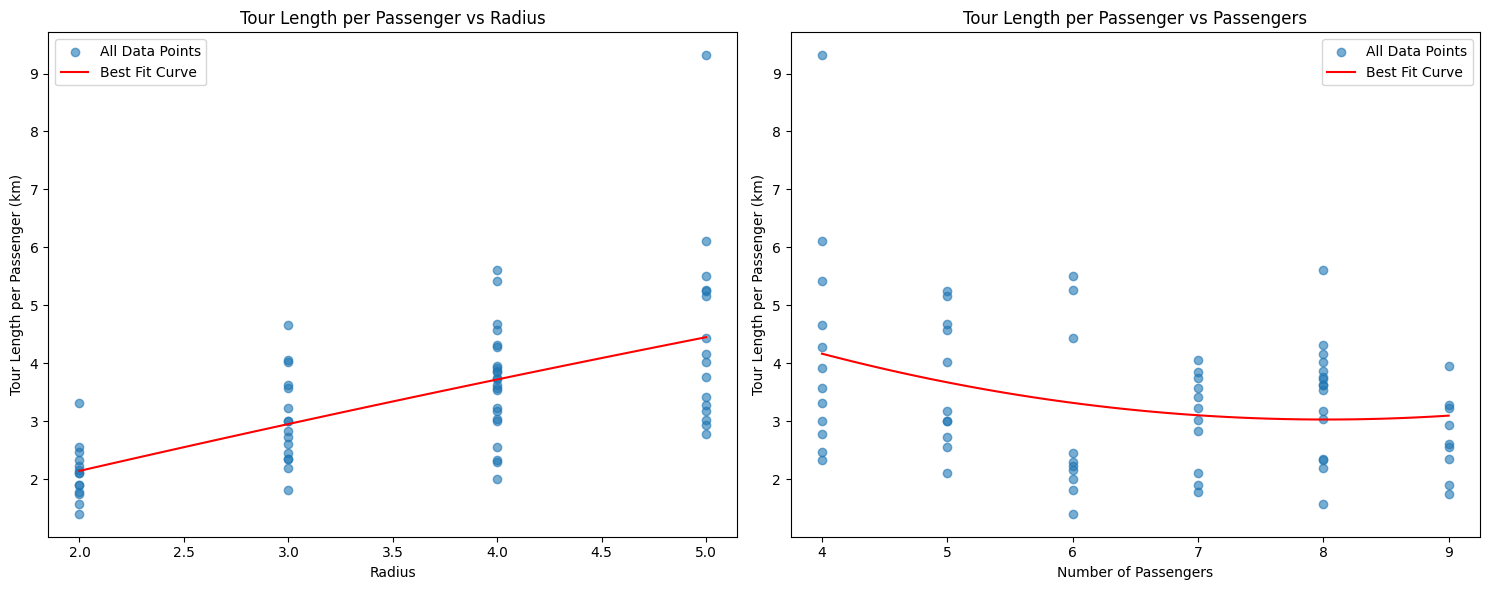

Total number of data points: 69

Descriptive Statistics for Tour Length per Passenger (km):
count    69.000000
mean      3.392085
std       1.314726
min       1.403363
25%       2.357078
50%       3.220567
75%       4.026933
max       9.315432
Name: Tour_Length_per_Passenger_km, dtype: float64

Correlation between variables:
                                Radius  Passengers  \
Radius                        1.000000    0.058584   
Passengers                    0.058584    1.000000   
Tour_Length_per_Passenger_km  0.620973   -0.291365   

                              Tour_Length_per_Passenger_km  
Radius                                            0.620973  
Passengers                                       -0.291365  
Tour_Length_per_Passenger_km                      1.000000  


In [8]:
# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Calculate Tour Length per Passenger
df['Tour_Length_per_Passenger_km'] = df['Tour_Length'] / (1000 * df['Passengers'])

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# 1. Tour Length per Passenger vs Radius
plt.subplot(121)
# Scatter plot with all data points
plt.scatter(df['Radius'], df['Tour_Length_per_Passenger_km'], alpha=0.6, label='All Data Points')

# Polynomial fit
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

popt, _ = curve_fit(polynomial_fit, df['Radius'], df['Tour_Length_per_Passenger_km'])
x_fit = np.linspace(df['Radius'].min(), df['Radius'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Radius')
plt.ylabel('Tour Length per Passenger (km)')
plt.title('Tour Length per Passenger vs Radius')
plt.legend()

# 2. Tour Length per Passenger vs Passengers
plt.subplot(122)
# Scatter plot with all data points
plt.scatter(df['Passengers'], df['Tour_Length_per_Passenger_km'], alpha=0.6, label='All Data Points')

# Polynomial fit
popt, _ = curve_fit(polynomial_fit, df['Passengers'], df['Tour_Length_per_Passenger_km'])
x_fit = np.linspace(df['Passengers'].min(), df['Passengers'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Best Fit Curve')

plt.xlabel('Number of Passengers')
plt.ylabel('Tour Length per Passenger (km)')
plt.title('Tour Length per Passenger vs Passengers')
plt.legend()

plt.tight_layout()
plt.show()

# Print additional insights
print("Total number of data points:", len(df))
print("\nDescriptive Statistics for Tour Length per Passenger (km):")
print(df['Tour_Length_per_Passenger_km'].describe())

print("\nCorrelation between variables:")
correlation_matrix = df[['Radius', 'Passengers', 'Tour_Length_per_Passenger_km']].corr()
print(correlation_matrix)

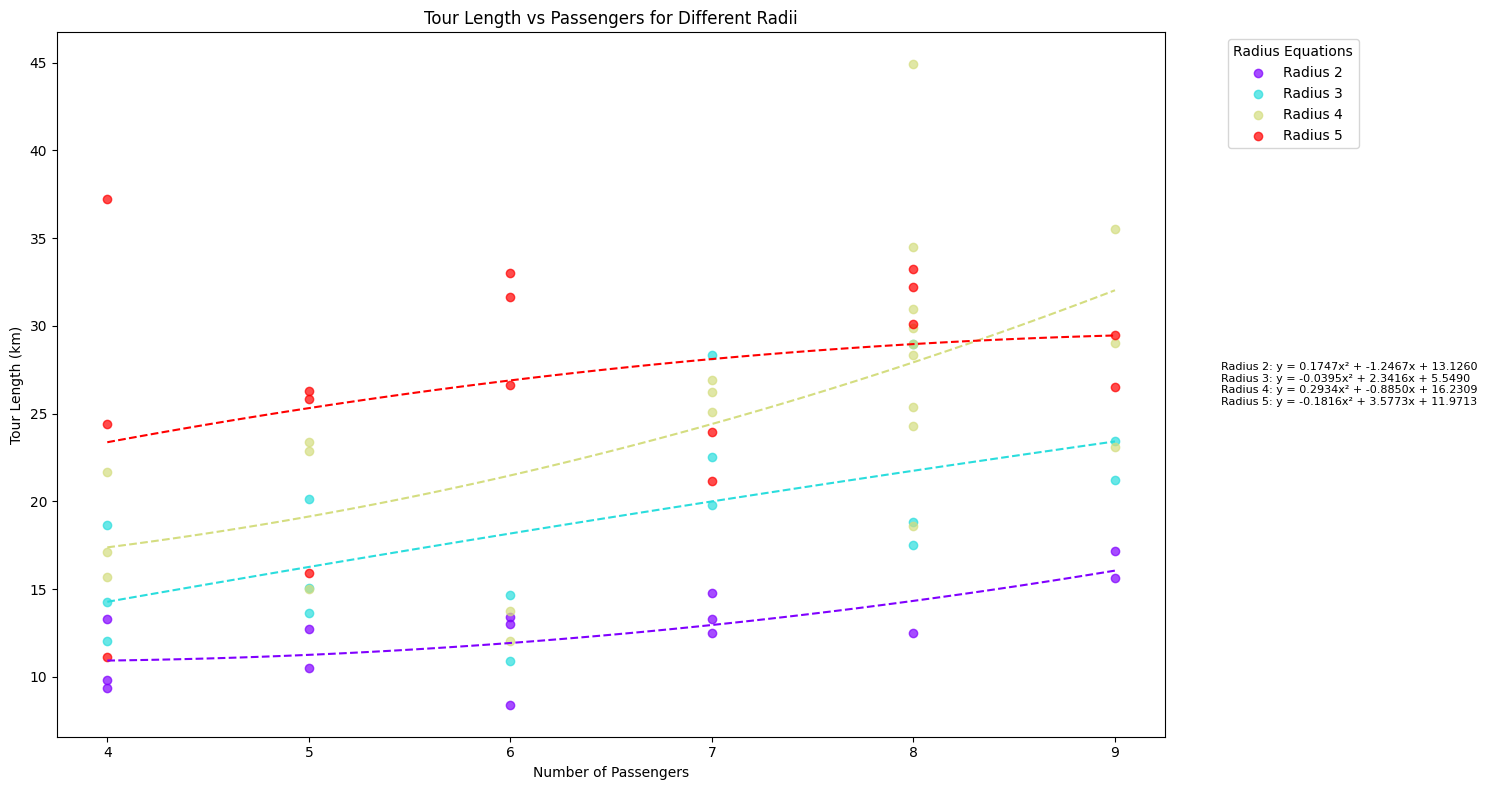

Radius Line Equations:
Radius 2: y = 0.1747x² + -1.2467x + 13.1260
Radius 3: y = -0.0395x² + 2.3416x + 5.5490
Radius 4: y = 0.2934x² + -0.8850x + 16.2309
Radius 5: y = -0.1816x² + 3.5773x + 11.9713


In [11]:
# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Convert Tour Length to kilometers
df['Tour_Length_km'] = df['Tour_Length'] / 1000

# Create the plot
plt.figure(figsize=(15, 8))

# Define curve fitting function
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Get unique radii
unique_radii = sorted(df['Radius'].unique())

# Color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_radii)))

# Prepare to store equations
equations = []

# Plot each radius
for radius, color in zip(unique_radii, colors):
    # Filter data for this radius
    radius_df = df[df['Radius'] == radius]
    
    # Scatter plot for this radius
    plt.scatter(radius_df['Passengers'], radius_df['Tour_Length_km'], 
                color=color, label=f'Radius {radius}', alpha=0.7)
    
    # Fit curve for this radius
    if len(radius_df) > 3:  # Ensure enough points for curve fitting
        try:
            popt, _ = curve_fit(polynomial_fit, radius_df['Passengers'], radius_df['Tour_Length_km'])
            
            # Store the equation
            a, b, c = popt
            equation = f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}'
            equations.append(f'Radius {radius}: {equation}')
            
            # Plot the curve
            x_fit = np.linspace(radius_df['Passengers'].min(), radius_df['Passengers'].max(), 100)
            y_fit = polynomial_fit(x_fit, *popt)
            plt.plot(x_fit, y_fit, color=color, linestyle='--')
        except Exception as e:
            print(f"Could not fit curve for Radius {radius}: {e}")

plt.xlabel('Number of Passengers')
plt.ylabel('Tour Length (km)')
plt.title('Tour Length vs Passengers for Different Radii')

# Create legend with equations
plt.legend(title='Radius Equations', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add equations as text
plt.text(1.05, 0.5, '\n'.join(equations), transform=plt.gca().transAxes, 
         verticalalignment='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print equations for reference
print("Radius Line Equations:")
for eq in equations:
    print(eq)

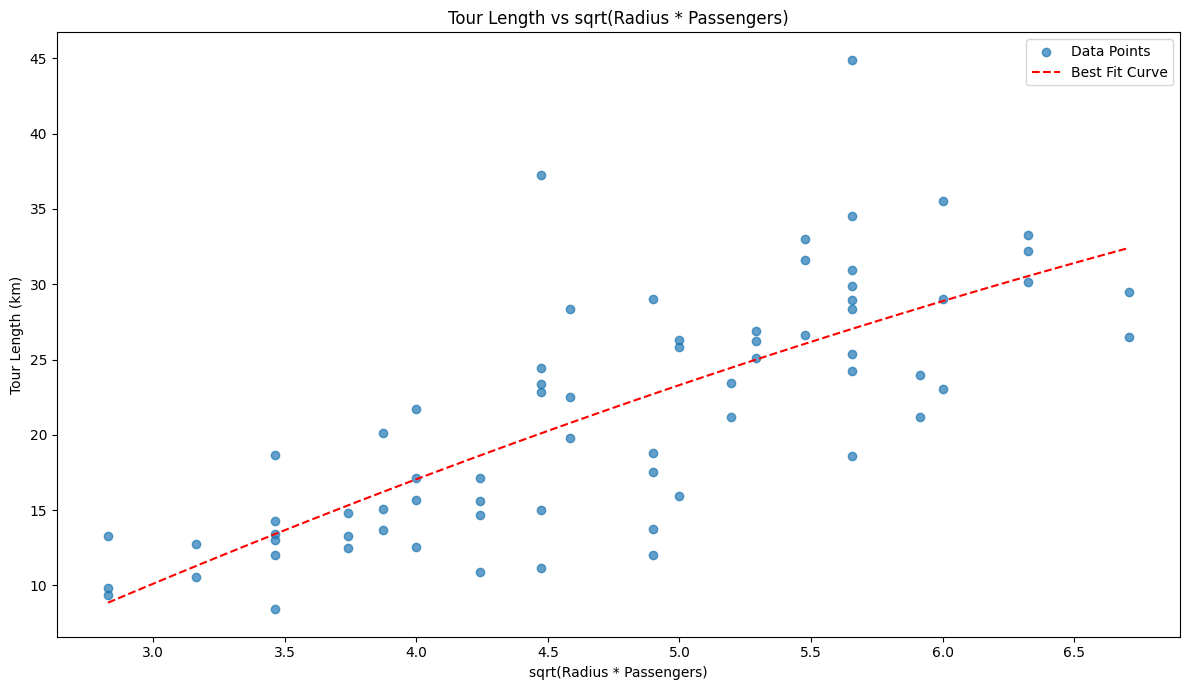

Correlation between variables:
                        Sqrt_Radius_Passengers  Tour_Length_km
Sqrt_Radius_Passengers                 1.00000         0.75817
Tour_Length_km                         0.75817         1.00000

Linear Regression Results:
Slope (Coefficient): 6.108003617795891
Intercept: -7.544496921626315
R-squared: 0.5748222615264056


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the CSV data
df = pd.read_csv('trip_data_campus_fishcreek2.csv')

# Clean the data - remove rows with empty Tour_Length
df = df.dropna(subset=['Tour_Length'])

# Convert Tour Length to kilometers
df['Tour_Length_km'] = df['Tour_Length'] / 1000

# Calculate sqrt(Radius * Passengers)
df['Sqrt_Radius_Passengers'] = np.sqrt(df['Radius'] * df['Passengers'])

# Create the plot
plt.figure(figsize=(12, 7))

# Define curve fitting function
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Scatter plot of all points
plt.scatter(df['Sqrt_Radius_Passengers'], df['Tour_Length_km'], alpha=0.7, label='Data Points')

# Fit curve
popt, _ = curve_fit(polynomial_fit, df['Sqrt_Radius_Passengers'], df['Tour_Length_km'])
x_fit = np.linspace(df['Sqrt_Radius_Passengers'].min(), df['Sqrt_Radius_Passengers'].max(), 100)
y_fit = polynomial_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Best Fit Curve')

plt.xlabel('sqrt(Radius * Passengers)')
plt.ylabel('Tour Length (km)')
plt.title('Tour Length vs sqrt(Radius * Passengers)')
plt.legend()
plt.tight_layout()
plt.show()

# Print additional insights
print("Correlation between variables:")
correlation_matrix = df[['Sqrt_Radius_Passengers', 'Tour_Length_km']].corr()
print(correlation_matrix)

# Regression analysis
from sklearn.linear_model import LinearRegression
X = df['Sqrt_Radius_Passengers'].values.reshape(-1, 1)
y = df['Tour_Length_km'].values

# Linear regression
lr = LinearRegression()
lr.fit(X, y)
print("\nLinear Regression Results:")
print(f"Slope (Coefficient): {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_}")
print(f"R-squared: {lr.score(X, y)}")

## Station 2

Station 3

Station 4

Station 5

Station 6

Station 7

Station 8